## Magnetization of a Superconductor

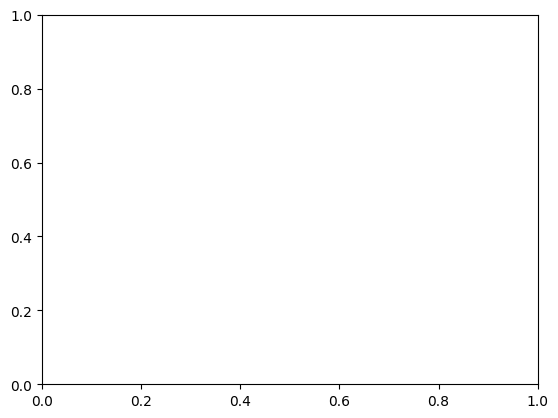

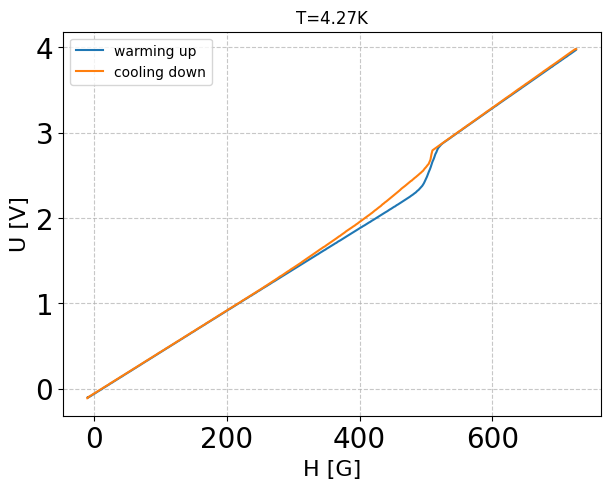

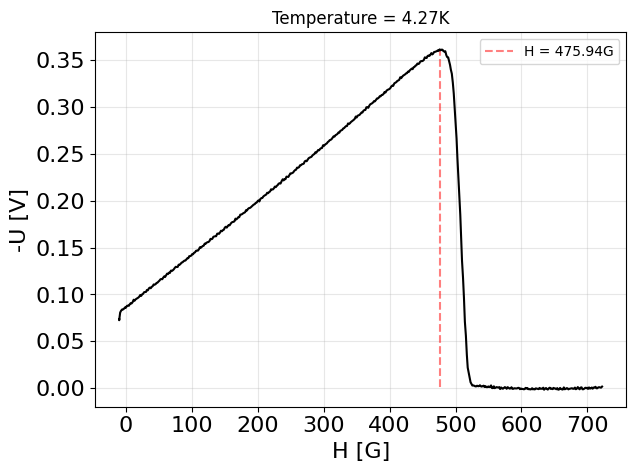

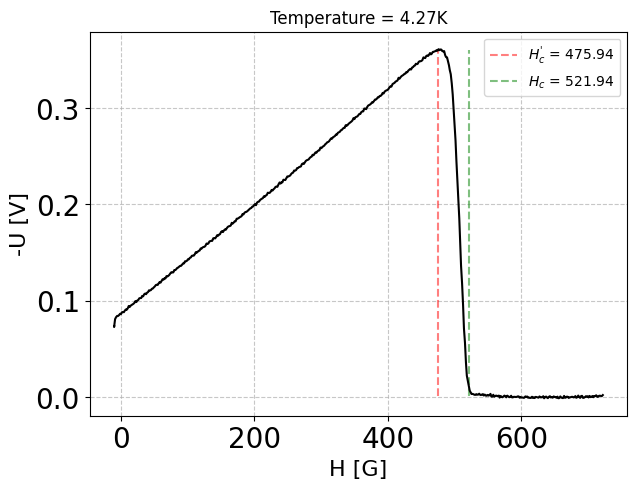

wow


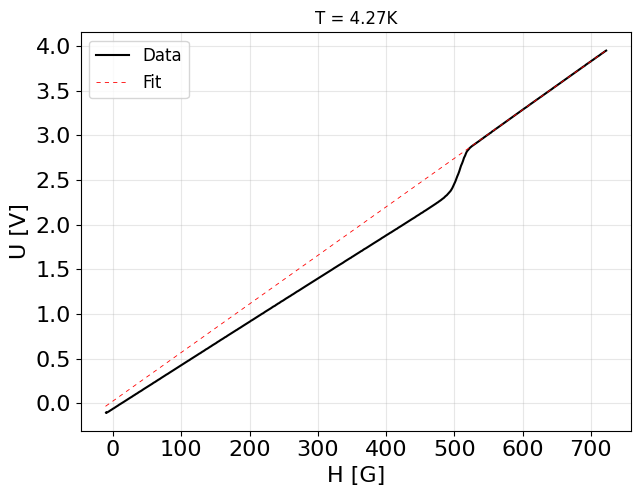

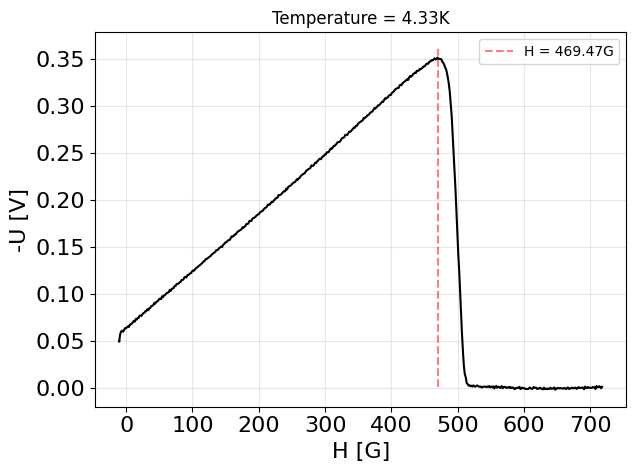

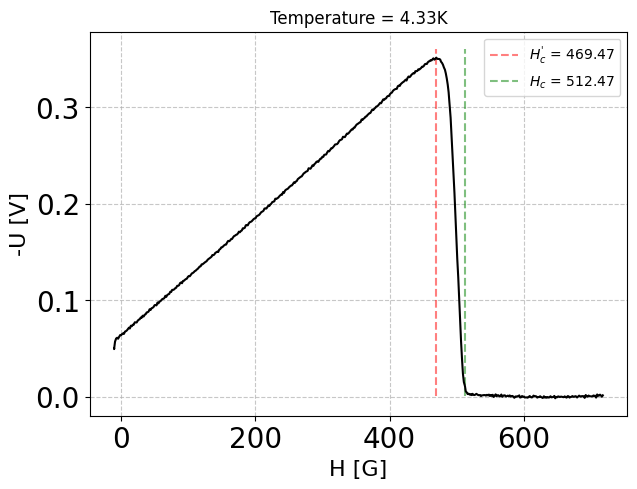

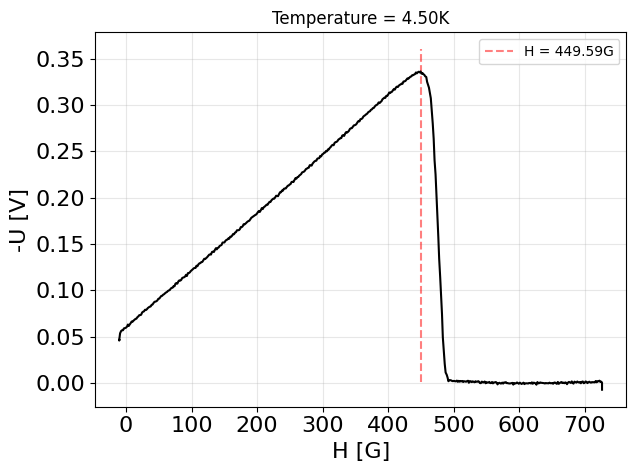

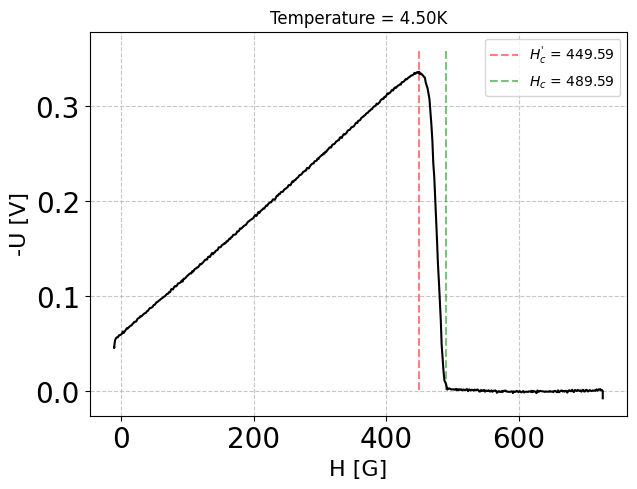

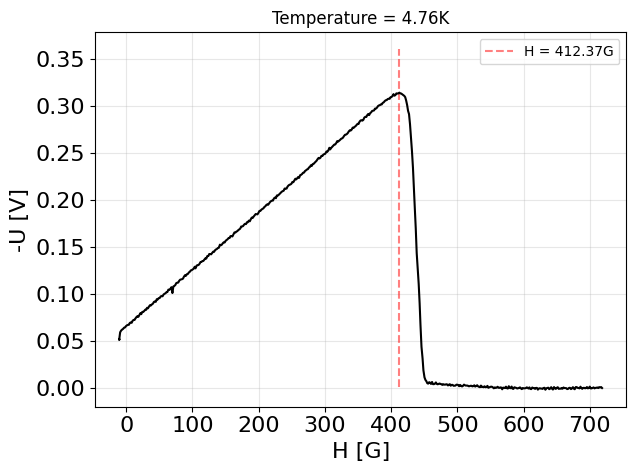

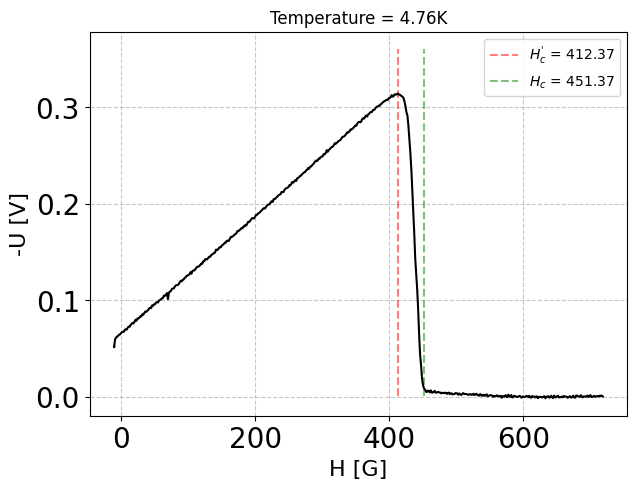

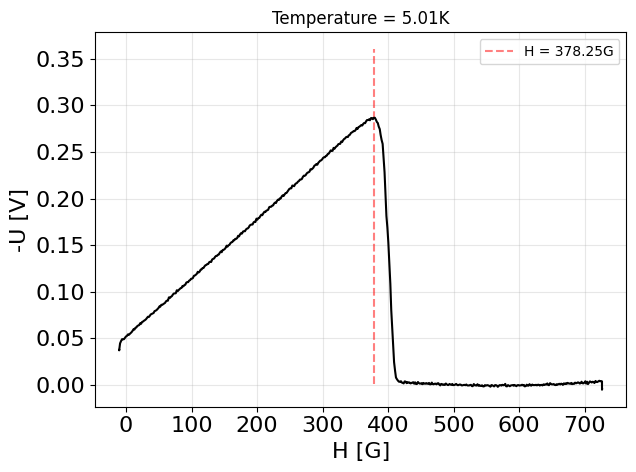

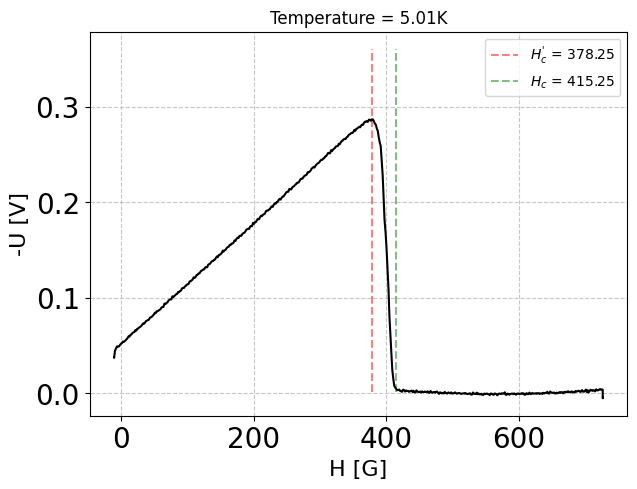

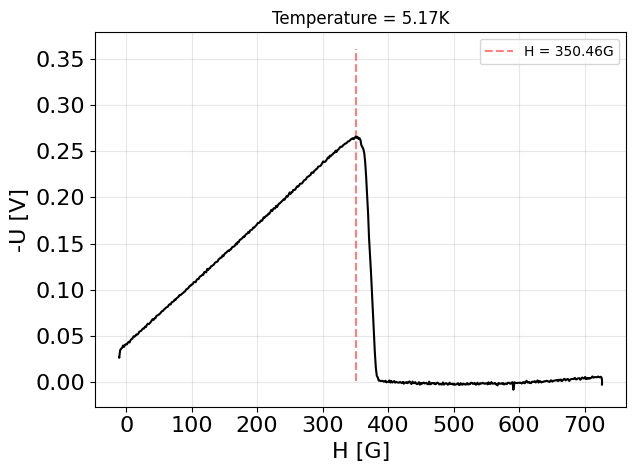

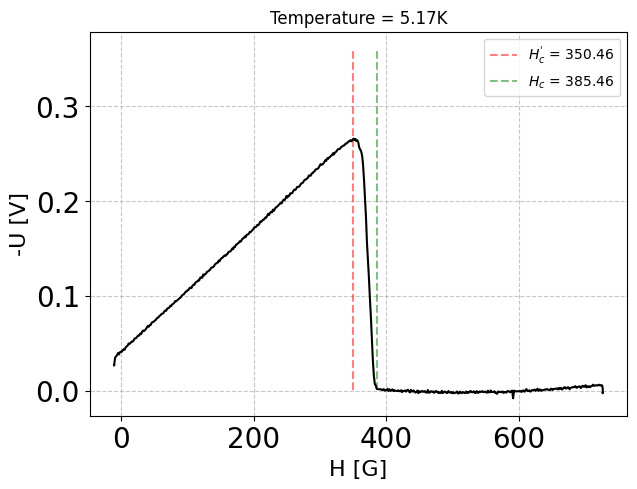

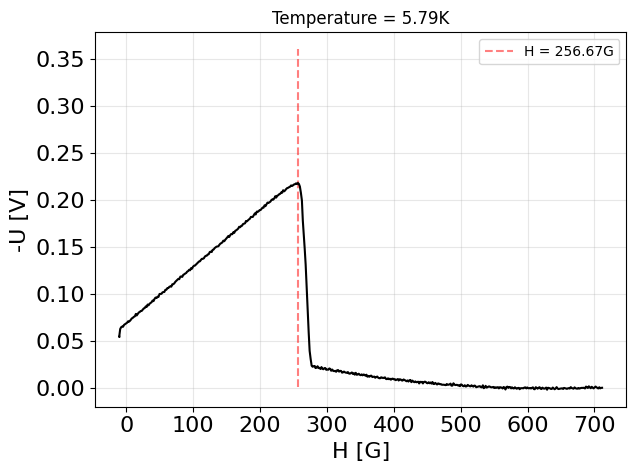

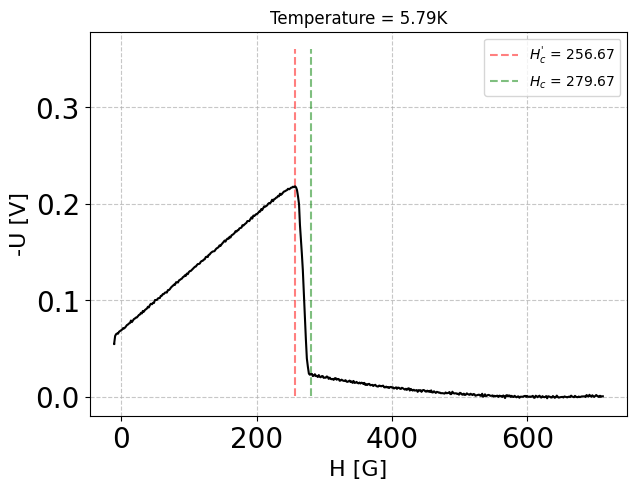

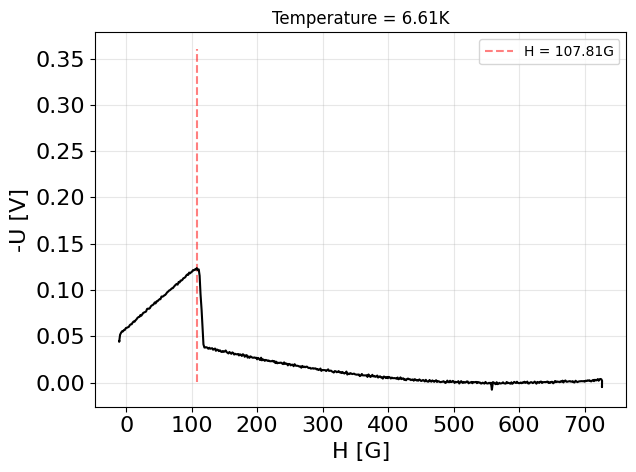

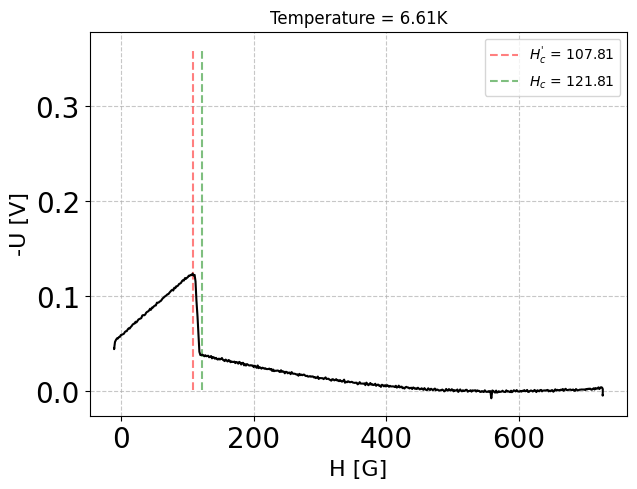

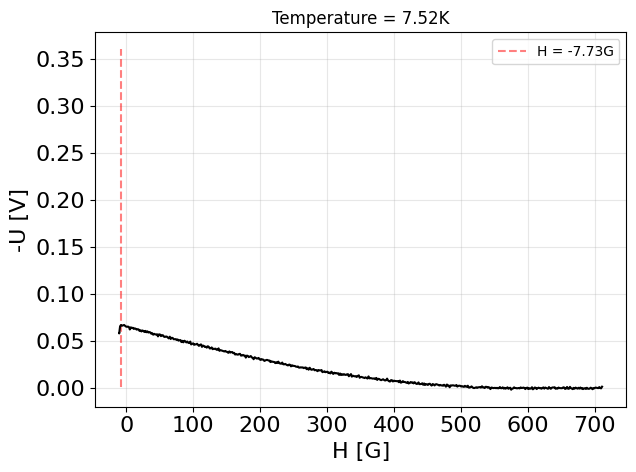

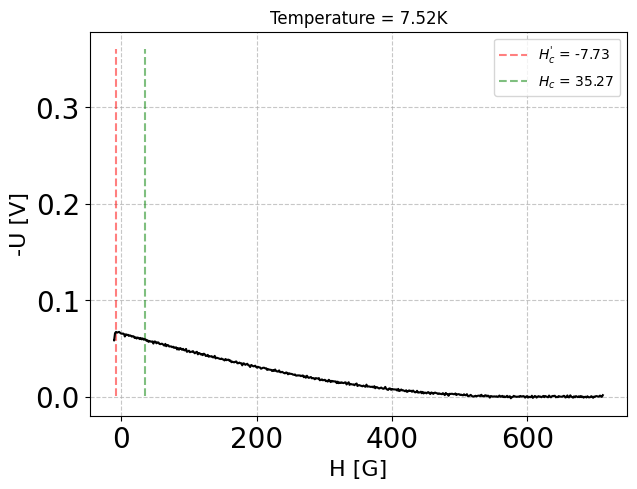

m and c =  -13.068222082388008 706.9891416105183
error of fitting: [ 0.43747344 13.97670026]
error of fitting 2: [0.05033595 0.29333052]


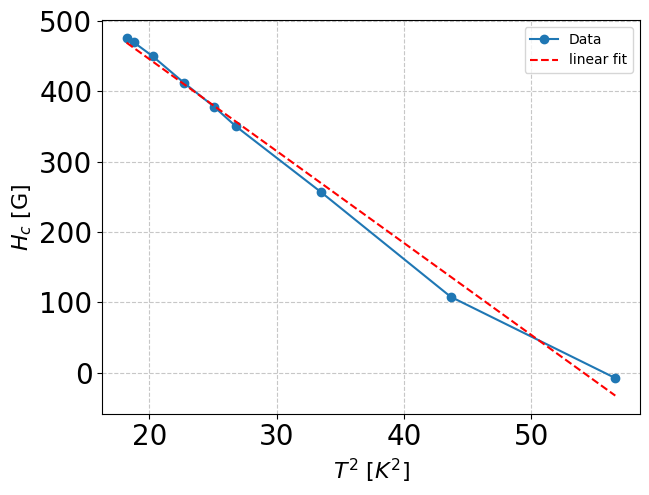

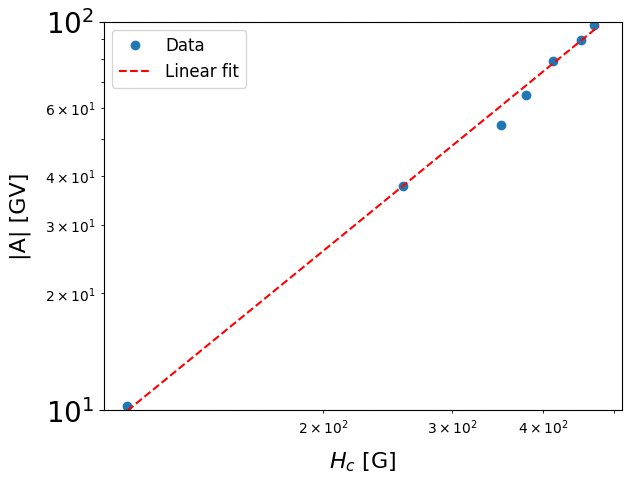

Slope of the fitted line: 1.5332105259718016
average DMF =  0.08604127711535015


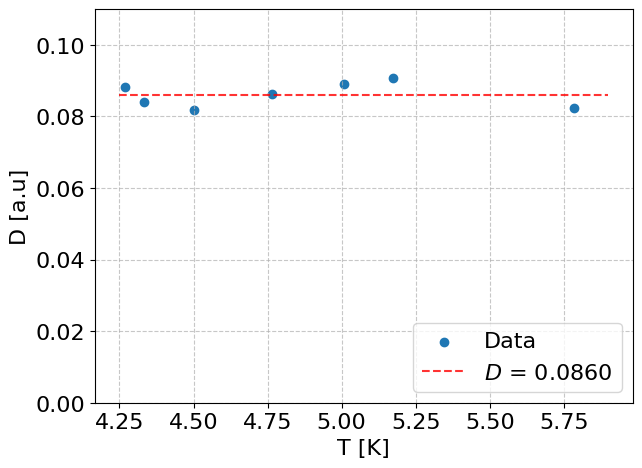

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

# fd means field dependent
# td means temperature dependent
input_path_fd = '/Users/ssajal/Desktop/academic/practical_M.1/megnatization_of_superconductor/data_copy/Field_dependent/'
input_path_td = '/Users/ssajal/Desktop/academic/practical_M.1/megnatization_of_superconductor/data_copy/Temperature_dependent/'
output_path = '/Users/ssajal/Desktop/academic/practical_M.1/megnatization_of_superconductor/code/outputs/'
output_path_02 = "/Users/ssajal/Desktop/academic/practical_M.1/megnatization_of_superconductor/code/outputs/field_dependent"

file_names = np.array(["01","02","03","04","05","06","07","08","09","10"])


def f_straightline(x, m, c):
    return m * x + c

def f_background_substraction(R_Sample, I_Coil, U_Magnetometer,i):
    # H = k*I_Coil; magnetic field strength
    H = I_Coil * 739
  
    # masking the value with which we have to fit a straight line, which will be the background
    mask_for_fitting = (H >= 0.75*739) & (H <= 1.0*739)
    H_filtered = H[mask_for_fitting]
    U_Magnetometer_filtered = U_Magnetometer[mask_for_fitting]

    # temperature calculation
    t = 1.017 + 6.07 * np.exp(-R_Sample/1700) + 40.6 * np.exp(-R_Sample/170)
    T = np.average(t)

    # Perform curve fitting
    popt, pcov = curve_fit(f_straightline, H_filtered, U_Magnetometer_filtered)
    # background
    background = f_straightline(H, *popt)

    residual = background - U_Magnetometer

    return H, T, U_Magnetometer, residual, background
    

def f_initial_curve(H, U_Magnetometer, background,T,i):
        if i == 0:
            print("wow")
            # Plot the data points
            plt.plot(H, U_Magnetometer, color="black", label='Data')
            # Plot the fit
            plt.plot(H, background, 'r--',linewidth=.6,dashes=(5, 5), label='Fit')
            plt.xlabel("H [G]",fontsize=16)
            plt.ylabel("U [V]",fontsize=16)
            plt.xticks(fontsize=16)  # Set font size for x-axis ticks
            plt.yticks(fontsize=16)  # Set font size for y-axis ticks
            plt.legend(fontsize=12)  # Set font size for legend
            plt.grid(True, alpha=0.3)
            plt.title(f"T = {T:.2f}K")
            plt.subplots_adjust(left=0.12, right=0.98, top=0.95, bottom=0.12)
            plt.savefig(output_path+"field_dependent/background_remove_0.jpg")
            #plt.show()

def f_sharp_drop_point(H, residual):
    for i in range(0,len(H[np.argmax(residual):])):
        difference = residual[np.argmax(residual)+i] - residual[np.argmax(residual)+i+10]
        if np.abs(difference) < .001:
            return i+10

def all_curve_seperatred(H, residual,T, i, T_c_endpoint):
    # hline means actually vline
    hline_index = np.argmax(residual)
    H_max_all.append(H[hline_index]) # append to H_max_all
    # area calculation
    area = np.trapz(residual[:hline_index], x = H[:hline_index])
    area_all.append(area)
    plt.vlines(H[hline_index], ymin=.001, ymax=.36, color='r', linestyle='--', alpha = .5, label=f"H = {H[hline_index]:.2f}G")
    plt.plot(H, residual,color='black')
    plt.title(f"Temperature = {T:.2f}K")
    plt.xlabel("H [G]",fontsize=16)
    plt.ylabel("-U [V]",fontsize=16)
    plt.xticks(fontsize=16)  # Set font size for x-axis ticks
    plt.yticks(fontsize=16)  # Set font size for y-axis ticks
    plt.grid(True, alpha=0.3)
    plt.subplots_adjust(left=0.15, right=0.98, top=0.9, bottom=0.12)
    plt.legend()
    plt.savefig(output_path+f"field_dependent/{i}.jpg")
    #plt.show()

    ######### demagnetization factor ########
    fig, ax2 = plt.subplots()
    if i == 6:
        T_c_endpoint = T_c_endpoint - 5
    if i == 7:
        T_c_endpoint = T_c_endpoint - 16
    
    DMF = 1 - (H[hline_index]/(H[hline_index]+T_c_endpoint))
    #print("dmf",DMF)
    DMF_all.append(DMF)
    # H_c^'
    ax2.vlines(H[hline_index], ymin=.001, ymax=.36, color='r', linestyle='--', alpha = .5, label=f"$H_c^'$ = {H[hline_index]:.2f}")
    # H_c
    ax2.vlines(H[hline_index]+T_c_endpoint, ymin=.001, ymax=.36, color='g', linestyle='--', alpha = .5, label=f"$H_c$ = {H[hline_index]+T_c_endpoint:.2f}")
    ax2.plot(H, residual,color='black')
    ax2.set_xlabel("H [G]",size=16)
    ax2.set_ylabel("-U [V]",size=16)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_position([0.14, .14, 0.84, 0.80]) #left,bottom,right,top
    ax2.set_title(f"Temperature = {T:.2f}K")
    ax2.legend()
    ax2.figure.savefig(output_path+f"field_dependent/Demagnetization_factor/DF_{i}.jpg", format="jpg")

def all_curve_in_one(H, residual,T, i):
    ax0.plot(H, residual, label = f"T={T:.2f}K")
    ax0.set_xlabel("H [G]",size=16)
    ax0.set_ylabel("-U [V]",size=16)
    ax0.tick_params(axis='x', labelsize=20)
    ax0.tick_params(axis='y', labelsize=20)
    ax0.grid(True, linestyle='--', alpha=0.7)
    ax0.set_position([0.14, .14, 0.84, 0.84]) #left,bottom,right,top
    ax0.set_title("")

def generate_latex_table(Header, *table_values):
    # Combine arrays into a list of lists with specify the number of digits after the decimal
    data = list(zip(*(map(lambda x: [f'{val:.2f}' for val in x], table_values))))
    # Generate LaTeX table code
    latex_table = tabulate(data, Header, tablefmt="latex_raw")
    return latex_table

fig, ax0 = plt.subplots() # all in one


def f_initial_raw_curve(R_Sample, I_Coil, U_Magnetometer, key):
    # H = k*I_Coil; magnetic field strength
    H = I_Coil * 739
    # temperature calculation
    t = 1.017 + 6.07 * np.exp(-R_Sample/1700) + 40.6 * np.exp(-R_Sample/170)
    T = np.average(t)

    #fig, ax00 = plt.subplots()
    ax00.plot(H,U_Magnetometer, label = key)
    ax00.set_xlabel("H [G]",size=16)
    ax00.set_ylabel("U [V]",size=16)
    ax00.tick_params(axis='x', labelsize=20)
    ax00.tick_params(axis='y', labelsize=20)
    ax00.grid(True, linestyle='--', alpha=0.7)
    ax00.set_position([0.14, .14, 0.84, 0.8]) #left,bottom,right,top
    #ax00.set_title("")
    #plt.show()
    return T




########################### section 1 ###################################

H_max_all = []# H_c
T_all = []
area_all = []
DMF_all = []
fig, ax00 = plt.subplots()

for i in range(0,9):
    #print(i)
    R_Sample, I_Coil, U_Magnetometer = np.loadtxt(input_path_fd + file_names[i], unpack = True)
    if i == 0:
        dummy_0 = f_initial_raw_curve(R_Sample[:np.argmax(I_Coil)], I_Coil[:np.argmax(I_Coil)], U_Magnetometer[:np.argmax(I_Coil)], "warming up")
        dummy_0 = f_initial_raw_curve(R_Sample[np.argmax(I_Coil):], I_Coil[np.argmax(I_Coil):], U_Magnetometer[np.argmax(I_Coil):],"cooling down")
        #ax00.figure.savefig(output_path+f"field_dependent/raw_initial.jpg")
        ax00.set_title(f"T={dummy_0:.2f}K")
        ax00.legend()
        ax00.figure.savefig(output_path+f"field_dependent/raw_initial.jpg")
        plt.show()
    H, T, U_Magnetometer, residual, background = f_background_substraction(R_Sample[:np.argmax(I_Coil)-10], I_Coil[:np.argmax(I_Coil)-10], U_Magnetometer[:np.argmax(I_Coil)-10],i)
    #H_max_all.append(H)
    T_all.append(T)

    T_c_endpoint = f_sharp_drop_point(H, residual)
    # all plots seperated
    dummy_2 = all_curve_seperatred(H, residual, T, i,T_c_endpoint)
    plt.show()
    # all plots in one
    dummy_3 = all_curve_in_one(H, residual, T, i)
    plt.show()
    # initial plot
    dummy_1 = f_initial_curve(H, U_Magnetometer,background,T,i)
    plt.show()


ax0.legend()
ax0.figure.savefig(output_path+f"field_dependent/all_in_one.jpg")

########################### section 2 ###################################
# convert the list to numpy array
T_all = np.array(T_all)
H_max_all = np.array(H_max_all)

# table for overleaf
Header = ["T", "H_c"]
generated_table = generate_latex_table(Header,T_all, H_max_all)
#print(generated_table)

fig, ax1 = plt.subplots()
#T_squared = [t**2 for t in T_all]
T_squared = T_all**2
# fitting a straight line on T_square vs H_c
def fitting_T_square_vs_H_c(x,y):
    # Perform curve fitting
    popt, pcov = curve_fit(f_straightline, x, y)
    print("m and c = ", *popt)
    print("error of fitting:",np.sqrt(np.diag(pcov)))
    fitted_y = f_straightline(x, *popt)
    ax1.plot(T_squared, H_max_all, marker="o", label="Data")
    ax1.plot(x, fitted_y, label="linear fit", color='r', linestyle='--',)
    ax1.set_xlabel("$T^2$ $[K^2]$",size=16)
    ax1.set_ylabel("$H_c$ [G]",size=16)
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()
    ax1.set_position([0.15, .15, 0.84, 0.82]) #left,bottom,right,top
    ax1.figure.savefig(output_path+f"field_dependent/T_c-vs_H_c.jpg", format = "jpg")
    

dummy_4 = fitting_T_square_vs_H_c(T_squared, H_max_all)

########################### section 3 ###################################
area_all = np.array(area_all)
# table for overleaf
Header_1 = ["H_c [G]", "A [GV]"]
generated_table = generate_latex_table(Header_1,H_max_all, area_all)
#print(generated_table)

def plot_log_log_with_linear_fit(H_max_all, area_all, output_path):
    # Define linear model function
    def linear_model(x, a, b):
        return a * x + b

    # Perform curve fitting
    popt, pcov_2 = curve_fit(linear_model, np.log(H_max_all), np.log(area_all))
    # Extract fitted parameters
    slope, intercept = popt
    print("error of fitting 2:",np.sqrt(np.diag(pcov_2)))
    # Plot the log-log plot with the data points
    fig, ax = plt.subplots()
    ax.loglog(H_max_all, area_all, marker='o', linestyle='', label='Data')
    # Plot the fitted line
    x_fit = np.linspace(min(H_max_all), max(H_max_all), 100)
    y_fit = np.exp(linear_model(np.log(x_fit), slope, intercept))
    ax.loglog(x_fit, y_fit, color='red', linestyle='--', label=f'Linear fit')
    # Set ylim
    ax.set_ylim(10, 100)
    ax.set_xlabel("$H_c$ [G]",size=16, labelpad = 10)
    ax.set_ylabel("|A| [GV]",size=16, labelpad = 10)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    ax.set_position([0.18, .15, 0.81, 0.81]) #left,bottom,right,top
    # Show legend
    ax.legend(fontsize="large")
    # Save the figure
    ax.figure.savefig(output_path + "field_dependent/H_c-vs-area.jpg", format="jpg")
    # Show the plot
    plt.show()
    # Return the slope of the fitted line
    return slope

# Example usage
slope = plot_log_log_with_linear_fit(H_max_all[:-1], area_all[:-1], output_path)
print("Slope of the fitted line:", slope)

########################### section 4 ###################################
# DMF vs T
DMF_all = np.array(DMF_all)

def f_DMF_vs_T(x,y):
    print("average DMF = " , np.average(y))
    fig, ax1 = plt.subplots()
    # Perform curve fitting
    ax1.scatter(x, y, label="Data")
    ax1.hlines(np.average(y),xmin = 4.25, xmax = 5.9, color='r', linestyle='--', alpha = .8, label=f"$D$ = {np.average(y):.4f}")
    ax1.set_xlabel("T [K]",size=16)
    ax1.set_ylabel("D [a.u]",size=16)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.tick_params(axis='y', labelsize=16)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_ylim(.0,.11)
    ax1.legend(loc='lower right',fontsize=16)
    ax1.set_position([0.15, .15, 0.84, 0.82]) #left,bottom,right,top
    ax1.figure.savefig(output_path+f"field_dependent/DMF-vs-T.jpg", format = "jpg")
    

dummy_4 = f_DMF_vs_T(T_all[:-2], DMF_all[:-2])



